In [1]:
import time, sys
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [40]:
# wave speed
c = 1.0

# setup spatial grid (vertex-centered)
L = 2.0         # size of physical grid
nx = 61         # total number of grid points
dx = L/(nx-1)   # grid spacing
x = np.linspace(0, L, nx)
print('grid spacing is',dx)

# setup time grid
dt = 0.025      # size of timesteps
T = L/c         # grid-crossing time
nt = int(0.5*T/dt)  # total number of timesteps
print('time stepsize is',dt)
print('total number of time steps is',nt)
print()

# stability diagnostics
v = dx/dt # characteristic grid speed
s = c/v   # Courant number
print('wave speed is',c)
print('characteristic grid speed is',v)
print('grid-crossing time is',L/c)
print('characteristic grid time is',L/v)
print('Courant number is',s)

grid spacing is 0.03333333333333333
time stepsize is 0.025
total number of time steps is 40

wave speed is 1.0
characteristic grid speed is 1.3333333333333333
grid-crossing time is 2.0
characteristic grid time is 1.5
Courant number is 0.75


In [41]:
# initialize grid function
u = np.zeros(nx)
# initial data
a = int(0.25*L/dx)
b = int(0.5*L/dx);
u1 = 1.
u2 = 2.
u3 = 1.
u[:a] = u1; u[a:b] = u2; u[b:] = u3
umax0 = np.amax(u)
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]


<IPython.core.display.Javascript object>


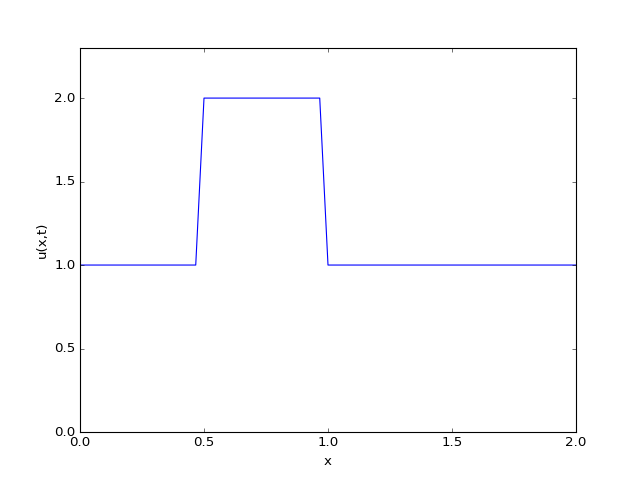

In [43]:
# plot initial configuration
plt.plot(x, u)
plt.ylim(0, 1.15*umax0)
plt.xlim(0, L)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

In [44]:
### added for 3d wireframe plots ###
# initialize output arrays
pstep = 1   # number of time steps between printing
nout = 1 + nt//pstep # number of snapshots that will be printed
tdata = np.zeros(nout)                    # initialize time step output array
xdata = np.linspace(0, L, nx)              # initialize xgrid output array
udata = np.zeros((len(tdata),len(xdata))) # initialize grid function output array
# print initial data to output arrays
tdata[0] = 0.
udata[0,:] = u[:]
# reset print counter
iprint=1

<IPython.core.display.Javascript object>


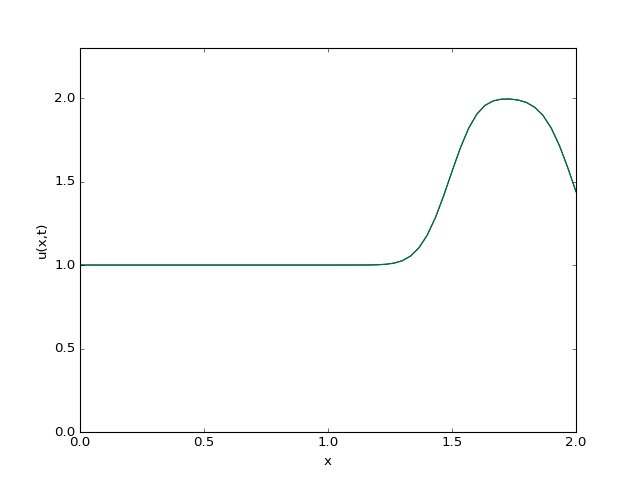

In [45]:
# initialize temporary grid function array
un = np.ones(nx)

# function to update plot at each time step
def replot(x, u, ax):
    ax.cla()
    ax.set_ylim(0, 1.15*umax0)
    ax.set_xlim(0, L)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.plot(x,u)
    fig.canvas.draw()
    #time.sleep(0.01)

# create figure
fig = plt.figure()
ax = fig.add_subplot(111)

#plot initial configuration
replot(x, u, ax)

# solve
for n in range(nt):
    un = u.copy()
    for i in range (1,nx):
        # evolve solution using forward-time backward-space (FTBS) scheme
        u[i] = un[i] - s*(un[i] - un[i-1])

    # update plot
    replot(x, u, ax)

    # save output
    if (n % pstep == 0):
        # print time step
        tdata[iprint] = n*dt
        # print grid functions
        udata[iprint,:] = u[:] 
        # increment print counter
        iprint = iprint + 1

In [46]:
# plot final configuration
plt.plot(x,u)
plt.ylim(0, 1.15*umax0)
plt.xlim(0, L)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

<IPython.core.display.Javascript object>


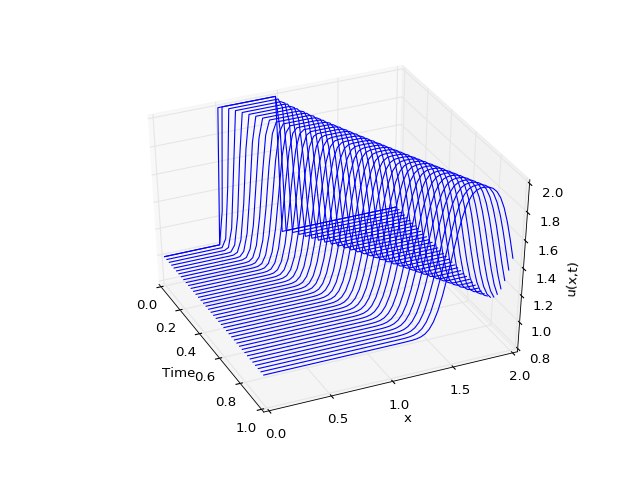

In [48]:
# 3d wireframe plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
XX, TT = np.meshgrid(xdata, tdata)
ax.plot_wireframe(TT, XX, udata, rstride=1, cstride=0)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('u(x,t)')
plt.show()

## Explorations

E1. What happens to the solution if you continue to **increase** the spatial resolution while holding the time stepsize fixed? (Alternatively, try decreasing the time stepsize while holding the spatial resolution fixed.) Why does this happen?

E2. What happens to the solution if you continue to **decrease** the spatial resolution while holding the tiem stepsize fixed? (Alternatively, try increasing the time stepsize while holding the spatial resolution fixed.) Why does this happen?

E3. What happens to the solution if you change the sign in the advection equation from negative to positive? In other words, use the same scheme above (forwad differencing in time, backward differencing in space) to solve the equation $\partial_{x}u + c\partial_{t}u = 0$ instead of $\partial_{x}u - c\partial_{t}u = 0$. What happens to the analytical solution? What happens to the numerical solution?